# Auto Insurance 

### Notebook Imports
***

In [1]:
%matplotlib inline
%run ../python_files/imports

### Gather Data
***

In [2]:
auto_df = pd.read_csv('../data/auto_insurance_data.csv')

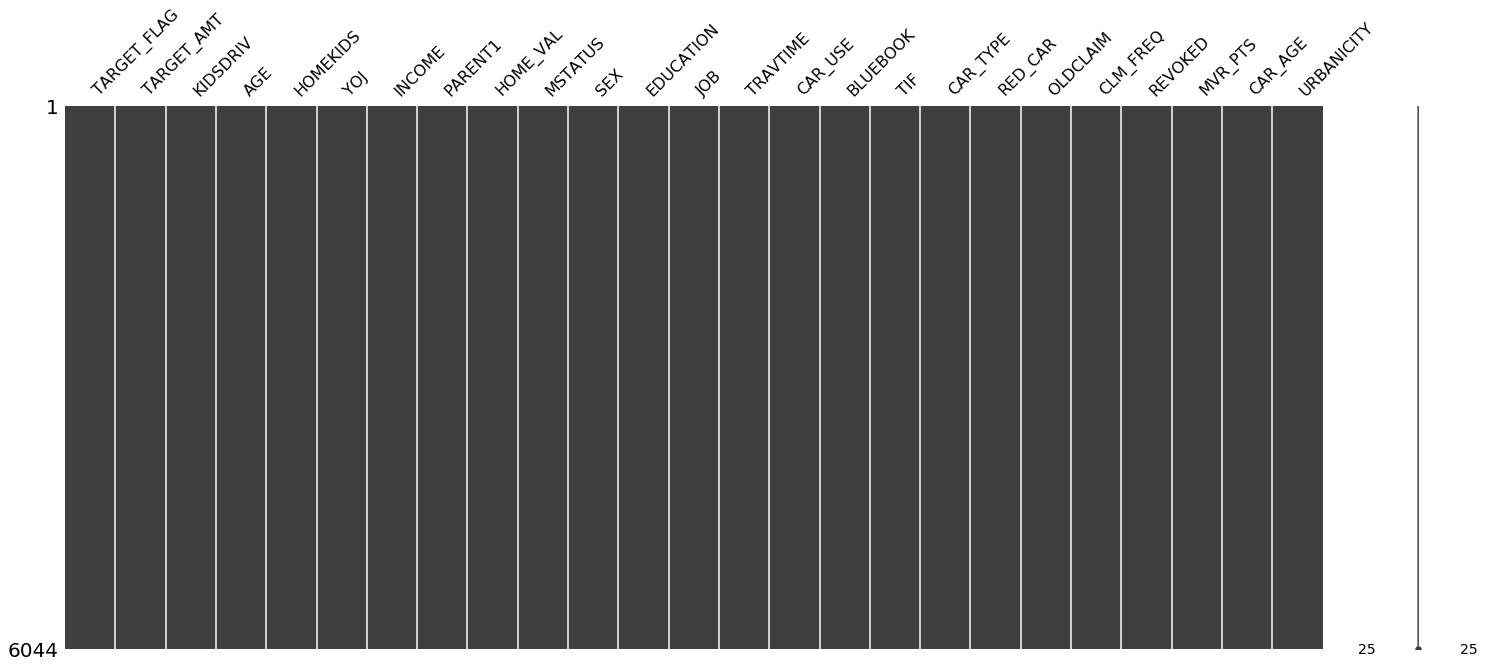

In [6]:
mno.matrix(auto_df)

In [7]:
auto_df.SEX.value_counts()

F    3358
M    2686
Name: SEX, dtype: int64

# Visualizing Data 
***

In [33]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 25 columns):
TARGET_FLAG    6044 non-null int64
TARGET_AMT     6044 non-null float64
KIDSDRIV       6044 non-null int64
AGE            6044 non-null int64
HOMEKIDS       6044 non-null int64
YOJ            6044 non-null int64
INCOME         6044 non-null float64
PARENT1        6044 non-null object
HOME_VAL       6044 non-null float64
MSTATUS        6044 non-null object
SEX            6044 non-null object
EDUCATION      6044 non-null object
JOB            6044 non-null object
TRAVTIME       6044 non-null float64
CAR_USE        6044 non-null object
BLUEBOOK       6044 non-null int64
TIF            6044 non-null int64
CAR_TYPE       6044 non-null object
RED_CAR        6044 non-null object
OLDCLAIM       6044 non-null int64
CLM_FREQ       6044 non-null int64
REVOKED        6044 non-null object
MVR_PTS        6044 non-null int64
CAR_AGE        6044 non-null int64
URBANICITY     6044 non-null object


In [8]:
auto_df.AGE.unique().sum()

2730

In [9]:
auto_df.TARGET_AMT.value_counts()

0.00000        4443
3667.00000        3
2027.00000        3
5453.00000        3
3350.00000        3
               ... 
4439.00000        1
7786.00000        1
2408.00000        1
1698.00000        1
13105.32763       1
Name: TARGET_AMT, Length: 1484, dtype: int64

In [10]:
auto_df.TARGET_AMT.describe()

count     6044.000000
mean      1479.664479
std       4553.548768
min          0.000000
25%          0.000000
50%          0.000000
75%       1036.250000
max      85523.653350
Name: TARGET_AMT, dtype: float64

In [11]:
auto_df.TARGET_AMT.value_counts() > 30000

0.00000        False
3667.00000     False
2027.00000     False
5453.00000     False
3350.00000     False
               ...  
4439.00000     False
7786.00000     False
2408.00000     False
1698.00000     False
13105.32763    False
Name: TARGET_AMT, Length: 1484, dtype: bool

In [39]:
tgt_amt = auto_df.loc[auto_df['TARGET_AMT'] > 0 ]

In [41]:
tgt_amt.dtype

TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE              int64
HOMEKIDS         int64
YOJ              int64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME       float64
CAR_USE         object
BLUEBOOK         int64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM         int64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE          int64
URBANICITY      object
dtype: object

In [47]:
tgt_amt.TARGET_AMT.value_counts().sum()

1601

In [23]:
type(auto_df['TARGET_AMT'])

pandas.core.series.Series

AttributeError: 'Text' object has no property 'locs'

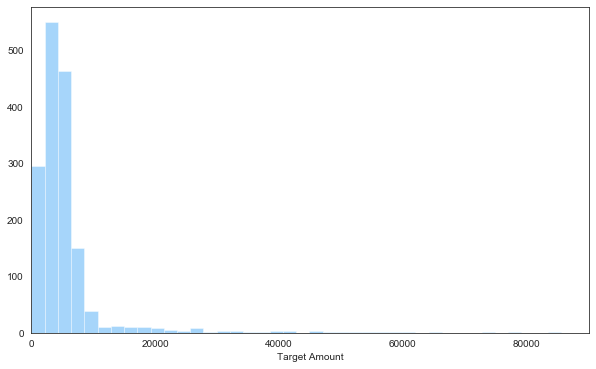

In [57]:
plt.figure(figsize=(10, 6))
sns.distplot(tgt_amt['TARGET_AMT'], bins=40, hist=True, kde=False, color='#2196f3')
plt.xlabel('Target Amount')
plt.xlim(left=-50, right=90000)
plt.xticks(locs=-50)
plt.show()

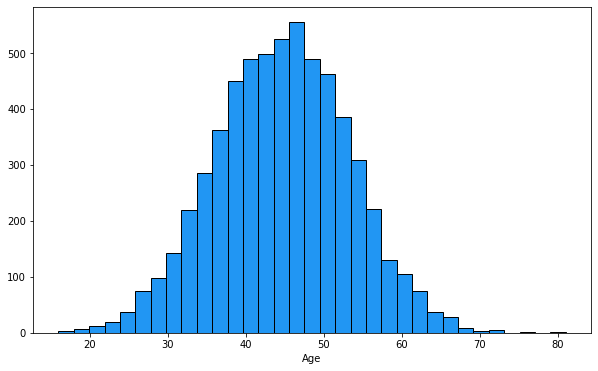

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(auto_df['AGE'], bins=33, ec='black', color='#2196f3')
plt.xlabel('Age')

plt.show()

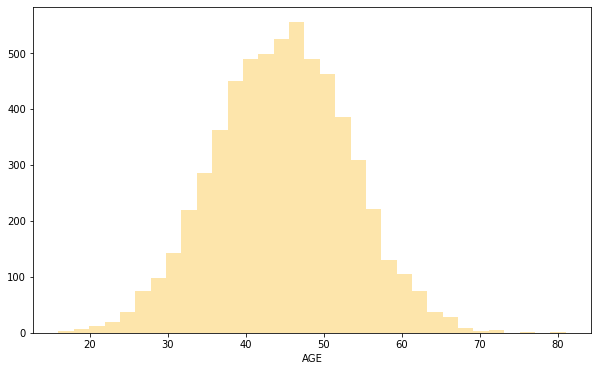

In [50]:
plt.figure(figsize=(10, 6))
sns.distplot(auto_df['AGE'], bins=33, hist=True, kde=False, color='#fbc02d')
plt.show()

In [ ]:
auto_df.CLM_FREQ.value_counts()

In [ ]:
auto_df.info()

In [ ]:
auto_df.describe()

## Correlation

In [51]:
auto_df['INCOME'].corr(auto_df['HOME_VAL'])

0.5817515079880978

In [52]:
auto_df.corr(method='spearman')

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
TARGET_FLAG,1.000000,0.984461,0.086157,-0.116862,0.127371,-0.049992,-0.153836,-0.189498,0.059933,-0.124604,-0.082636,0.242418,0.248737,0.202994,-0.110841
TARGET_AMT,0.984461,1.000000,0.083222,-0.113485,0.126448,-0.048186,-0.150576,-0.186318,0.057599,-0.117046,-0.082068,0.239617,0.244935,0.203883,-0.109127
KIDSDRIV,0.086157,0.083222,1.000000,-0.117629,0.482847,0.083950,-0.034004,-0.013903,-0.006962,-0.012110,-0.006441,0.047910,0.049324,0.056635,-0.042737
AGE,-0.116862,-0.113485,-0.117629,1.000000,-0.516491,0.139999,0.180619,0.209927,0.016232,0.158466,-0.000176,-0.044319,-0.041823,-0.068766,0.187003
HOMEKIDS,0.127371,0.126448,0.482847,-0.516491,1.000000,0.155519,-0.159742,-0.112359,-0.021496,-0.105771,-0.005929,0.059350,0.052813,0.069832,-0.158318
YOJ,-0.049992,-0.048186,0.083950,0.139999,0.155519,1.000000,0.220004,0.241606,-0.005275,0.089145,0.018324,-0.013230,-0.026143,-0.028690,0.039069
INCOME,-0.153836,-0.150576,-0.034004,0.180619,-0.159742,0.220004,1.000000,0.575379,-0.036014,0.377710,0.013000,-0.064288,-0.062609,-0.055207,0.394250
HOME_VAL,-0.189498,-0.186318,-0.013903,0.209927,-0.112359,0.241606,0.575379,1.000000,-0.025530,0.230875,0.000146,-0.106391,-0.108499,-0.071285,0.208844
TRAVTIME,0.059933,0.057599,-0.006962,0.016232,-0.021496,-0.005275,-0.036014,-0.025530,1.000000,-0.005902,-0.009337,-0.006143,0.006550,-0.005256,-0.024889
BLUEBOOK,-0.124604,-0.117046,-0.012110,0.158466,-0.105771,0.089145,0.377710,0.230875,-0.005902,1.000000,0.015358,-0.055806,-0.059837,-0.057158,0.153479


In [53]:
mask = np.zeros_like(auto_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

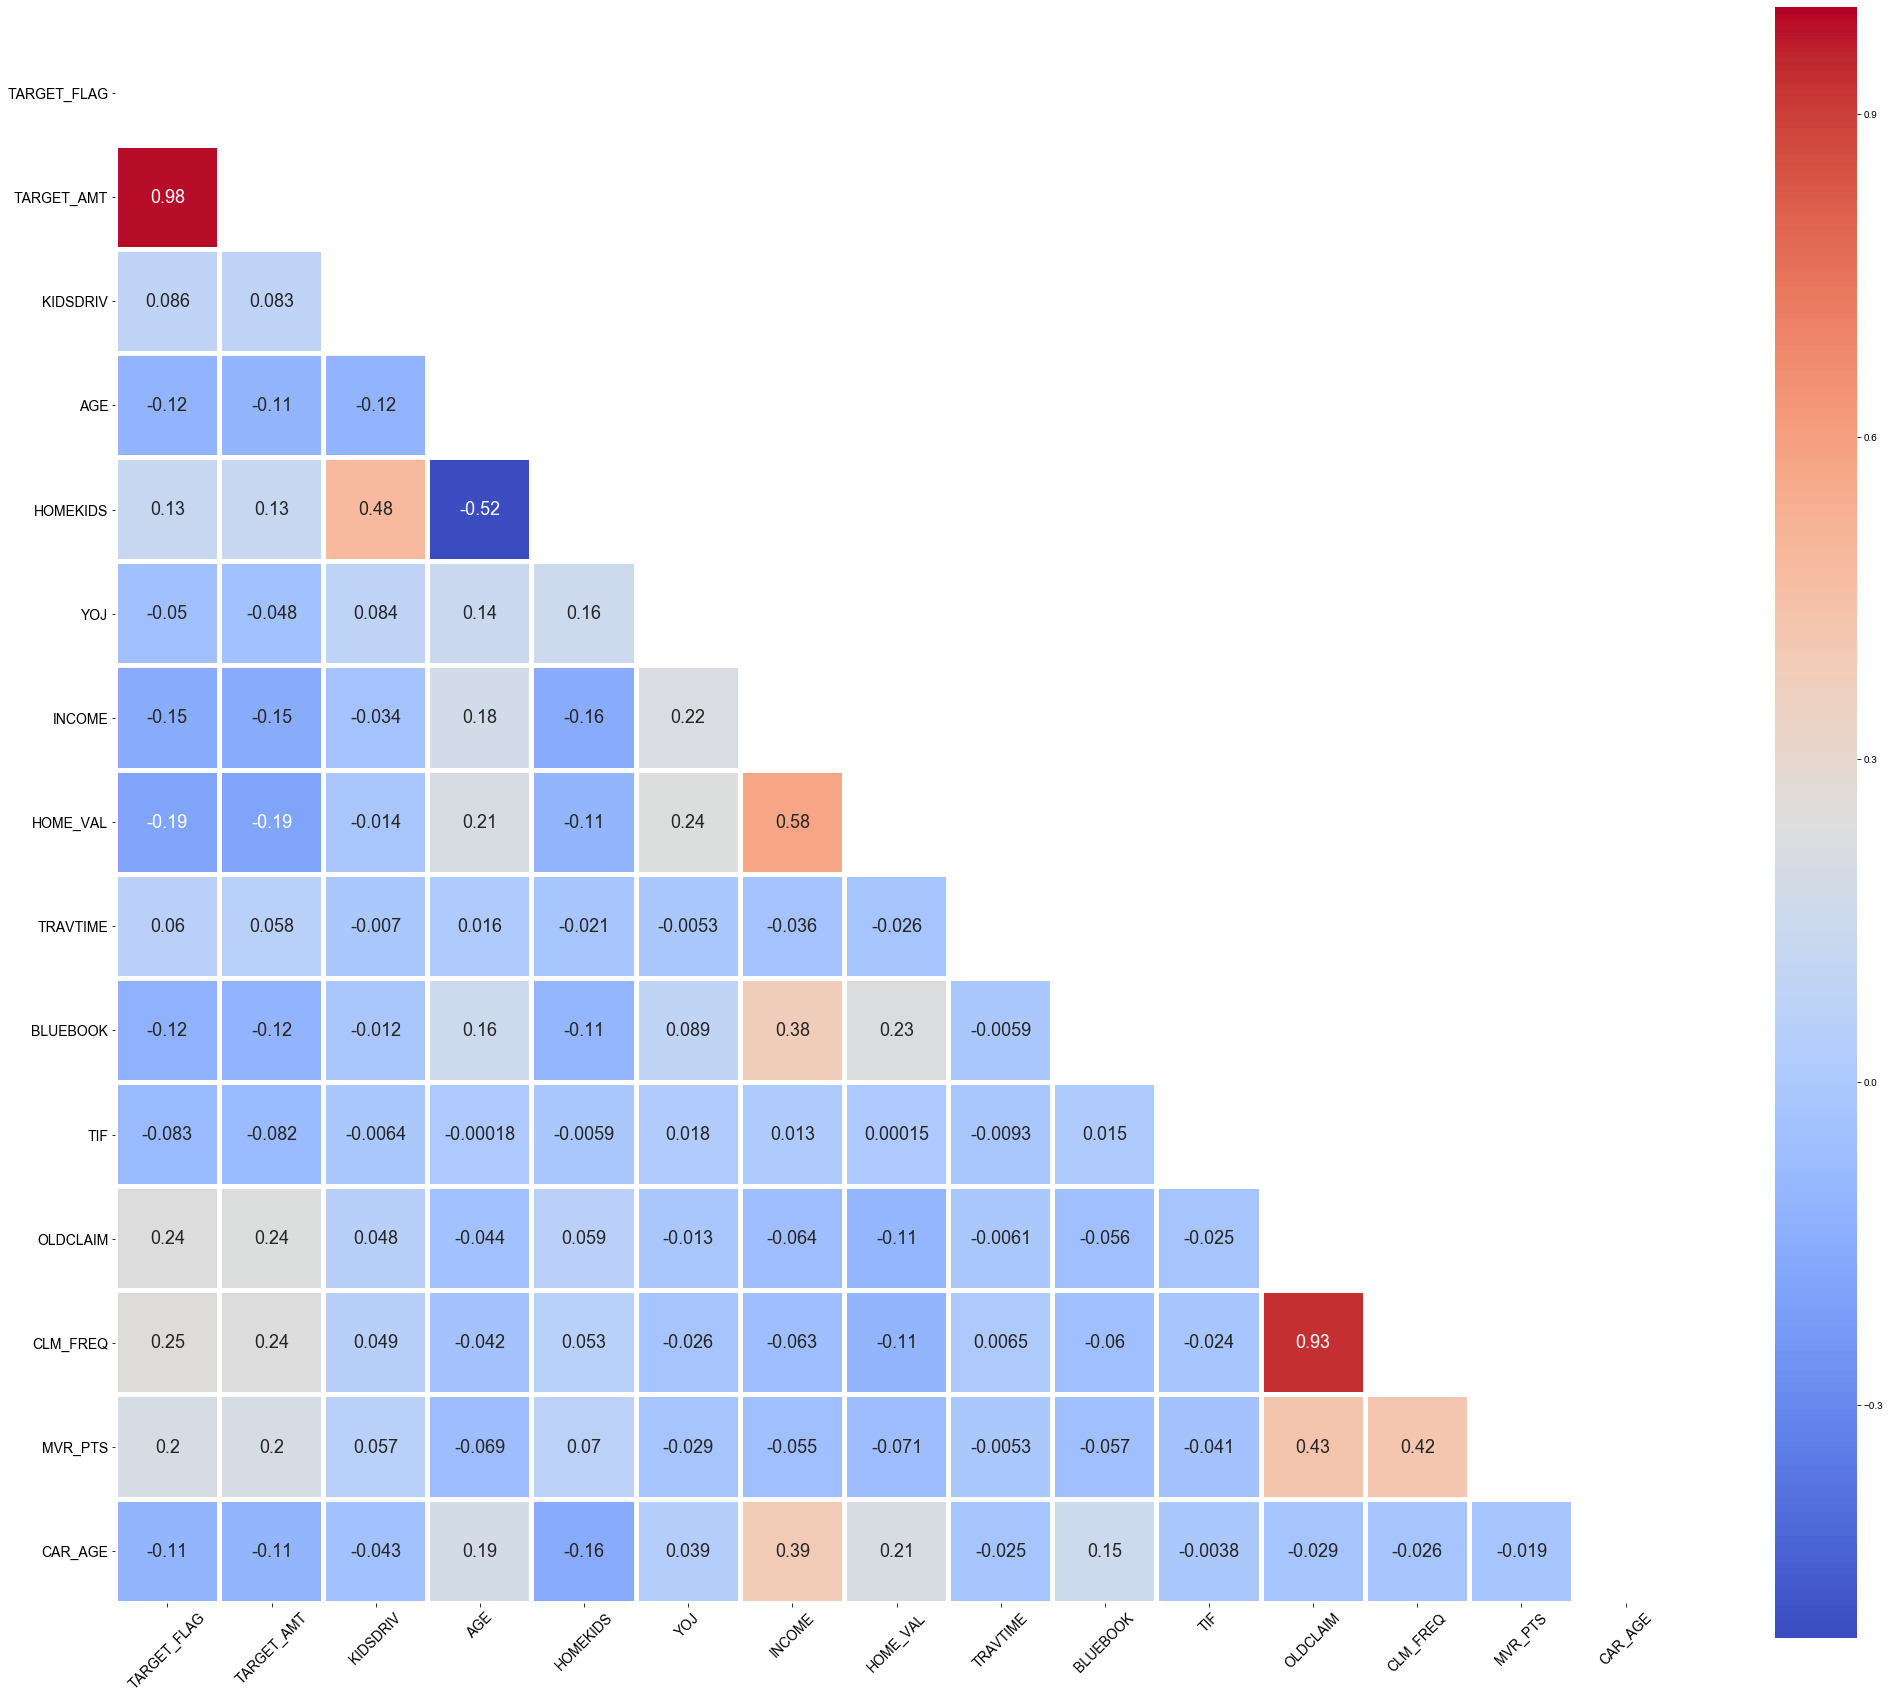

In [54]:

plt.figure(figsize=(35,30))
ax = sns.heatmap(auto_df.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.ylabel(ylabel=' ', labelpad=100)
plt.show()

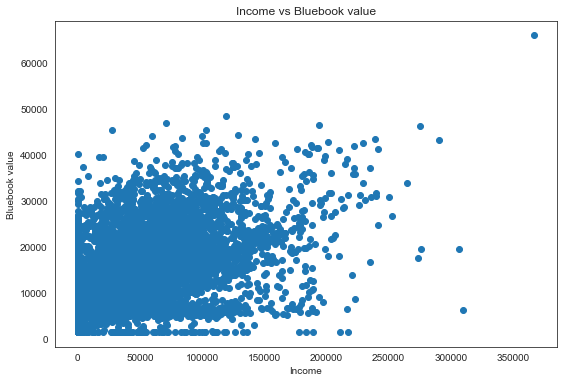

In [55]:
plt.figure(figsize=(9, 6))
plt.scatter(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'])
plt.title('Income vs Bluebook value')
plt.xlabel('Income')
plt.ylabel('Bluebook value')
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['CLM_FREQ'], y=auto_df['TARGET_AMT'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'], kind='hex', height=7, color='blue')
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

In [ ]:
sns.lmplot(x='INCOME', y='BLUEBOOK', data=auto_df, height=7)

In [ ]:
%%time

sns.pairplot(auto_df)
plt.show()

In [ ]:
%%time

sns.pairplot(auto_df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test Dataset Split